![](https://imgk.timesnownews.com/story/artist_impression_spaceship.jpg?tr=w-600,h-450,fo-auto)

## Importing Data and preprocessing

In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly as py 
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
sns.set(style='darkgrid', font_scale=1.4)

In [2]:
df_train = pd.read_csv("../input/spaceship-titanic/train.csv")
df_test = pd.read_csv("../input/spaceship-titanic/test.csv")
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Check number of different values of Cabin column
len(df_train.Cabin.unique())

6561

In [4]:
#Check test data
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
#Check train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Check test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


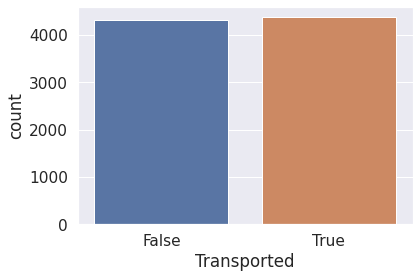

In [7]:
#Check labeled values distrbuition in train data
sns.countplot(df_train['Transported'])
plt.show()

Text(0.5, 1.0, 'Transported')

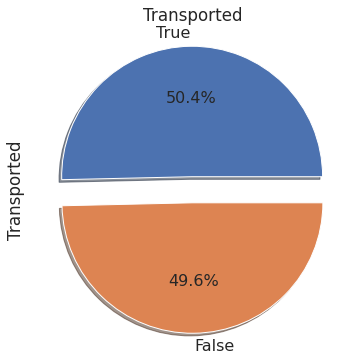

In [8]:
#Plot distrbution of survivors
plt.figure(figsize=(6,6))

# Pie plot
df_train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Transported")

#### We notice that our labeled is almost equally distrbuted 

Text(0.5, 0, 'Age vs Survivors')

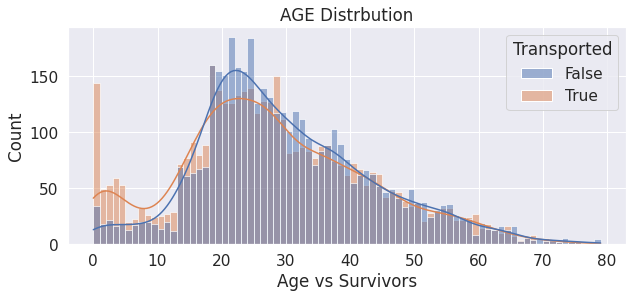

In [9]:
#Age and Survrivors
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('AGE Distrbution')
plt.xlabel('Age vs Survivors')

#### For people between (1, 20) years old a higher chance for being transported appears specially for very young childern (1-5) years, and the peak of people suffers from risk of not transported is from (20,25) years old

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

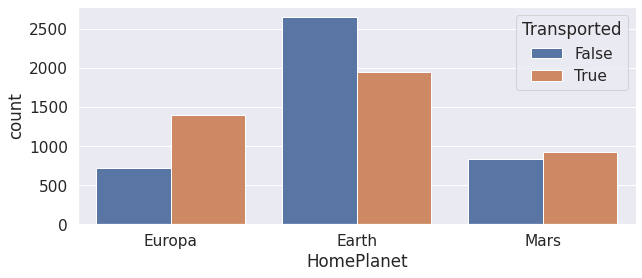

In [10]:
#HomePlanet and Survivors 
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='HomePlanet', hue='Transported')

#### We found that people from Earth have a lower chance to be transported, on the other side people from Europa have a higher chance to be transported, people from Mars have equally chance!

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

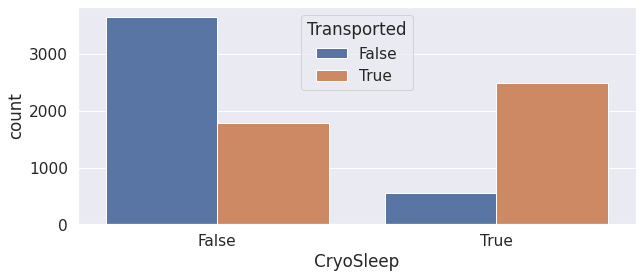

In [11]:
#CryoSleep and Survivors 
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='CryoSleep', hue='Transported')

#### People who choose to be confined to their Cryo have a higher chance to be transported than the people who choose to not confined

<AxesSubplot:xlabel='Destination', ylabel='count'>

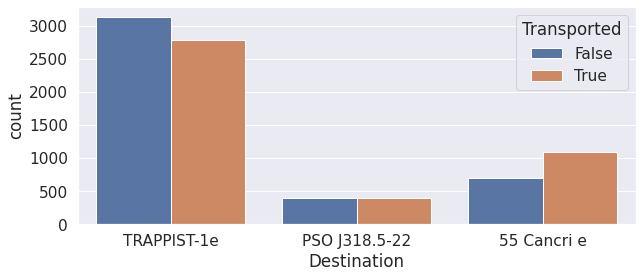

In [12]:
#Destination and Survivors 
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='Destination', hue='Transported')

#### People who was heading to "TRAPPIST-le" have a lower chance to be trasnported, while people heading to "PSO J318.5-22" has equal chance, Finally people heading to "55 Cancri e" have a lower chance to be transported

<AxesSubplot:xlabel='VIP', ylabel='count'>

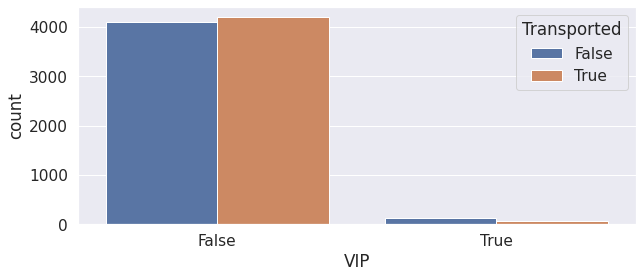

In [13]:
#VIP and Survivors 
plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='VIP', hue='Transported')

#### We notice that VIP service make no deference for being transported or not!

## Preprocessing

In [14]:
#Save ID column for test data as we will need it in submission step
df_test_id = df_test['PassengerId']

In [15]:
#As mentioned earlier Passenger ID contains GroupID_NumberInsideTheGroup, we will add a new column named Group then drop ID columns
df_train['Group'] = ''
df_test['Group'] = ''

for i in range(0, len(df_train)):
    df_train['Group'][i] = df_train['PassengerId'][i].split('_')[0]
for i in range(0, len(df_test)):
    df_test['Group'][i] = df_test['PassengerId'][i].split('_')[0]
    
df_train.drop('PassengerId', axis =1, inplace = True)
df_test.drop('PassengerId', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#Check data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Group         8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [17]:
##Replacing Null with N/0/N
df_train['Cabin'].fillna('N/0/N', inplace = True)
df_test['Cabin'].fillna('N/0/N', inplace = True)

In [18]:
#As mentioned earlier Passenger ID contains GroupID_NumberInsideTheGroup, we will add a new column named Deck and side then drop Cabin columns
df_train['Deck'] = ''
df_test['Deck'] = ''
df_train['Side'] = ''
df_test['Side'] = ''



for i in range(0, len(df_train)):
    df_train['Deck'][i] = df_train['Cabin'][i].split('/')[0]
    df_train['Side'][i] = df_train['Cabin'][i].split('/')[2]
for i in range(0, len(df_test)):
    df_test['Deck'][i] = df_test['Cabin'][i].split('/')[0]
    df_test['Side'][i] = df_test['Cabin'][i].split('/')[2]

df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Dealing with missing Values

In [19]:
#checking data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Group         8693 non-null   object 
 13  Deck          8693 non-null   object 
 14  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [20]:
#checking null values
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Deck              0
Side              0
dtype: int64

In [21]:
# Regarding the Age filling the missing data with the average would be a good action
df_train['Age'].fillna(value = df_train['Age'].mean(), inplace = True)
df_test['Age'].fillna(value = df_test['Age'].mean(), inplace = True)

In [22]:
#All expenses will be filled with zero for all null values
df_train['RoomService'].fillna(value = 0, inplace = True)
df_train['FoodCourt'].fillna(value = 0, inplace = True)
df_train['ShoppingMall'].fillna(value = 0, inplace = True)
df_train['Spa'].fillna(value = 0, inplace = True)
df_train['VRDeck'].fillna(value = 0, inplace = True)
df_test['RoomService'].fillna(value = 0, inplace = True)
df_test['FoodCourt'].fillna(value = 0, inplace = True)
df_test['ShoppingMall'].fillna(value = 0, inplace = True)
df_test['Spa'].fillna(value = 0, inplace = True)
df_test['VRDeck'].fillna(value = 0, inplace = True)

In [23]:
#No need for name columns so we will drop it
df_train.drop('Name', inplace = True, axis =1)
df_test.drop('Name', inplace = True, axis = 1)

In [24]:
#checking null values again
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Group             0
Deck              0
Side              0
dtype: int64

In [25]:
# For HomePlanet, CryoSleep, Destination and VIP we will fill NAN with the most frequent value
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace = True)
df_train['CryoSleep'].fillna( df_train['CryoSleep'].mode()[0], inplace = True)
df_train['Destination'].fillna( df_train['Destination'].mode()[0], inplace = True)
df_train['VIP'].fillna(df_train['VIP'].mode()[0], inplace = True)
df_test['HomePlanet'].fillna( df_test['HomePlanet'].mode()[0], inplace = True)
df_test['CryoSleep'].fillna( df_test['CryoSleep'].mode()[0], inplace = True)
df_test['Destination'].fillna( df_test['Destination'].mode()[0], inplace = True)
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace = True)

### Now we have done dealing with missing values

## Encoding Categorical Values

In [26]:
#checking data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Group         8693 non-null   object 
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB


In [27]:
#For categorical features with a few number of unique values (HomePlanet, CrySleep, Destination, VIP, Deck, Side) we will use one hot encoder, 
#and for bigger frequency feature (Group) we will use label encoder
one_hot_encoded_training_predictors = pd.get_dummies(df_train[['HomePlanet','Destination','Deck','Side']])
one_hot_encoded_testing_predictors = pd.get_dummies(df_test[['HomePlanet','Destination','Deck','Side']])
df_train.drop(['HomePlanet','Destination','Deck','Side'], axis = 1, inplace = True)
df_test.drop(['HomePlanet','Destination','Deck','Side'], axis = 1, inplace = True)
df_train = df_train.join(one_hot_encoded_training_predictors)
df_test = df_test.join(one_hot_encoded_testing_predictors)

In [28]:
#checking columns type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   Group                      8693 non-null   object 
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

In [29]:
#Converting bool columns into int
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
df_train['VIP'] = df_train['VIP'].astype(int)
df_train['Transported'] = df_train['Transported'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

In [30]:
#Finally we will apply label enconder to "Group"
le = preprocessing.LabelEncoder()
le.fit(df_train['Group'])
transformed = le.transform(df_train['Group'])
df_train['Group'] = transformed
le.fit(df_test['Group'])
transformed = le.transform(df_test['Group'])
df_test['Group'] = transformed

In [31]:
#checking columns type again
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   Group                      4277 non-null   int64  
 9   HomePlanet_Earth           4277 non-null   uint8  
 10  HomePlanet_Europa          4277 non-null   uint8  
 11  HomePlanet_Mars            4277 non-null   uint8  
 12  Destination_55 Cancri e    4277 non-null   uint8  
 13  Destination_PSO J318.5-22  4277 non-null   uint8

## Model

In [32]:
#Let's split our training data into train/test split
X = df_train.drop("Transported", axis = 1)
y = df_train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 40)

### Logistic Regression

In [33]:
#Predict our Test data using Logistic Regression
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)
predicted_lr = logmodel.predict(X_test)
#Evaluate our logistic regression model
print(confusion_matrix(y_test, predicted_lr))
print(classification_report(y_test, predicted_lr))
print(logmodel.score(X_test, y_test))

[[676 204]
 [146 713]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       880
           1       0.78      0.83      0.80       859

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

0.7987349051178838


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### K-Nearest Neighbor Classifier

In [34]:
#KNN classifier 
KN_calssifier = KNeighborsClassifier()
KN_calssifier.fit(X_train, y_train)
predicted_kn = KN_calssifier.predict(X_test)
print(confusion_matrix(y_test, predicted_kn))
print(classification_report(y_test, predicted_kn))

[[617 263]
 [192 667]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       880
           1       0.72      0.78      0.75       859

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739



In [35]:
#For loop to try different K values
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

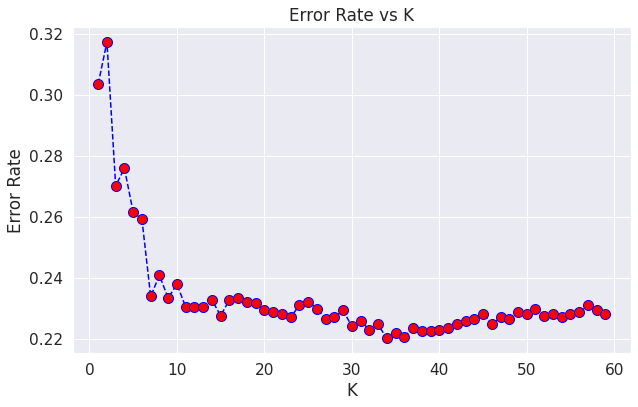

In [36]:
#Plt for-loop
plt.figure(figsize = (10,6))
plt.plot(range(1,60), error_rate, color = 'blue', linestyle = '--', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel("Error Rate")

#### We found the best K-value = 34

In [37]:
#KNN classifier after hypertuning
KN_calssifier = KNeighborsClassifier(n_neighbors=34)
KN_calssifier.fit(X_train, y_train)
predicted_kn = KN_calssifier.predict(X_test)
print(classification_report(y_test, predicted_kn))
print(confusion_matrix(y_test, predicted_kn))
print(KN_calssifier.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       880
           1       0.74      0.85      0.79       859

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.78      0.78      1739

[[624 256]
 [127 732]]
0.7797584818861415


### Decision Tree Classifier

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_dt = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))
print(dtree.score(X_test, y_test))

[[641 239]
 [227 632]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       880
           1       0.73      0.74      0.73       859

    accuracy                           0.73      1739
   macro avg       0.73      0.73      0.73      1739
weighted avg       0.73      0.73      0.73      1739

0.7320299022426682


### Random Forest Classifier

In [39]:
#Randomforest Classifier
rfc = RandomForestClassifier(n_estimators= 300)
rfc.fit(X_train, y_train)
predictions_rf = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))
print(rfc.score(X_test, y_test))

[[740 140]
 [198 661]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       880
           1       0.83      0.77      0.80       859

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

0.8056354226566993


### Naive Bayes Classifier

In [40]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_nb = NB.predict(X_test)
print(confusion_matrix(y_test, predictions_nb))
print(classification_report(y_test, predictions_nb))
print(NB.score(X_test, y_test))

[[487 393]
 [ 97 762]]
              precision    recall  f1-score   support

           0       0.83      0.55      0.67       880
           1       0.66      0.89      0.76       859

    accuracy                           0.72      1739
   macro avg       0.75      0.72      0.71      1739
weighted avg       0.75      0.72      0.71      1739

0.7182288671650374


### Support Vecotr Classifier

In [41]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
svc.fit(X_train, y_train)
predictions_svc = svc.predict(X_test)
print(confusion_matrix(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))
print(svc.score(X_test, y_test))

[[710 170]
 [156 703]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       880
           1       0.81      0.82      0.81       859

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739

0.8125359401955147


### Stochastic Gradient Descent

In [42]:
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train)
predictions_sgd = sgd.predict(X_test)
print(confusion_matrix(y_test, predictions_sgd))
print(classification_report(y_test, predictions_sgd))
print(sgd.score(X_test, y_test))

[[643 237]
 [155 704]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       880
           1       0.75      0.82      0.78       859

    accuracy                           0.77      1739
   macro avg       0.78      0.78      0.77      1739
weighted avg       0.78      0.77      0.77      1739

0.7745830937320299


### Neural Network

In [43]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (X_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, activation="relu")) # Hidden Layer 2
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu")) # Hidden Layer 3
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu")) # Hidden Layer 4
model.add(Dropout(0.2))


model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

2022-04-16 02:44:20.901313: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)
model.fit(X_train, y_train, batch_size = 64, epochs = 200, callbacks=[early_stop], validation_data=(X_test, y_test))

2022-04-16 02:44:21.492989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
109/109 [==============================] - 2s 6ms/step - loss: 10.4003 - accuracy: 0.5742 - val_loss: 0.6911 - val_accuracy: 0.5681
Epoch 2/200
109/109 [==============================] - 0s 4ms/step - loss: 1.3330 - accuracy: 0.5605 - val_loss: 0.6631 - val_accuracy: 0.5693
Epoch 3/200
109/109 [==============================] - 0s 4ms/step - loss: 0.9580 - accuracy: 0.5890 - val_loss: 0.6605 - val_accuracy: 0.5779
Epoch 4/200
109/109 [==============================] - 0s 4ms/step - loss: 0.8885 - accuracy: 0.5968 - val_loss: 0.6614 - val_accuracy: 0.5676
Epoch 5/200
109/109 [==============================] - 0s 4ms/step - loss: 0.7872 - accuracy: 0.6245 - val_loss: 0.6102 - val_accuracy: 0.7090
Epoch 6/200
109/109 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.6691 - val_loss: 0.6183 - val_accuracy: 0.7332
Epoch 7/200
109/109 [==============================] - 0s 4ms/step - loss: 0.7174 - accuracy: 0.6851 - val_loss: 0.6407 - val_accuracy: 0.642

In [45]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("Loss: "+ str(np.round(validation_loss, 3)))
print("Accuracy: "+ str(np.round(validation_accuracy, 3)))

55/55 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.7660
Loss: 0.535
Accuracy: 0.766


In [46]:
#Compare all models
from tabulate import tabulate
table = [['Model', 'Accuracy %'], ['Logistic Regression', logmodel.score(X_test, y_test) * 100], ['KNN-Classifier',KN_calssifier.score(X_test, y_test) *100], ['Decision Tree',dtree.score(X_test, y_test)*100], ['Random Forest',rfc.score(X_test, y_test)*100], ['Naive Bayese',NB.score(X_test, y_test)*100], ['Support Vector Classifier',svc.score(X_test, y_test)*100], ['Stochastics Gradient Descent',sgd.score(X_test, y_test)*100], ['Neural Network',validation_accuracy*100]]
print(tabulate(table))

----------------------------  -----------------
Model                         Accuracy %
Logistic Regression           79.87349051178838
KNN-Classifier                77.97584818861415
Decision Tree                 73.20299022426681
Random Forest                 80.56354226566992
Naive Bayese                  71.82288671650375
Support Vector Classifier     81.25359401955147
Stochastics Gradient Descent  77.458309373203
Neural Network                76.59574747085571
----------------------------  -----------------


#### We notice that the maximum accuracy come with SVC algortihm = 81% so we will go with it

## Predicting Test Data

In [47]:
#Predicting Test data
Transort_predicted = svc.predict(df_test)

In [48]:
#Converting test id series into DataFrame
submission = df_test_id.to_frame()

In [49]:
#Convert Int (1,0) into bool (True, False)
Transort_predicted = [bool(x) for x in Transort_predicted]

In [50]:
submission['Transported'] = Transort_predicted

In [51]:
submission.set_index('PassengerId')

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


In [52]:
#Exporting file as .csv
submission.to_csv('Submission', index = False)

## Thanks